In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import ttest_ind, probplot, shapiro, spearmanr
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('../jfreechart-stats.csv', index_col='class')
df.columns

Index([' NCLOC', ' DCP', ' NOCom', 'WMC'], dtype='object')

### removing space in columns name

In [25]:
for c in df.columns:
    df.rename(columns={c:c.strip()}, inplace=True)

In [26]:
df.columns

Index(['NCLOC', 'DCP', 'NOCom', 'WMC'], dtype='object')

## T4

(30%) **Évaluer les hypothèses suivantes** :

    a. WMC est une fonction linéaire du NCLOC
    b. WMC est une fonction linéaire du DCP
    c. WMC est une fonction linéaire du NOCom

Décrire d’abord la conception de l’étude (comme en T2) et discuter les résultats par la suite.

## Conception de l'étude


***Glossaire***

Variable | Définition
---------| ----------
NCLOC | nombre de lignes de code qui ne sont pas ni vides ni  commentaires
DCP | densité de commentaires (CLOC/LOC) donnée en pourcentage
NOCom | nombre de commits (combien de fois la classe a été changée) dans l’historique git de la classe
WMC | la métrique de complexité Weighed Methods per Class


### Introduction

Pour cette étude, on s'intéresse à la relation qu'il pourrait exister entre la complexité pondérée des méthodes par classe (WMC) et différentes variables. En raison d'exploration priliminaire (T3), nous faisons l'hypothèse qu'il pourrait exister une relation linéaire entre WMC et NCLOC, WMC et DCP ainsi que WMC et NOCom.

Ainsi, nous allons chercher à vérifier les hypothèses suivantes : 

1) >H1<sub>0</sub> : Il n'existe pas de relation linéaire entre WMC et NCLOC.
    
    >H1<sub>A</sub> : Il existe une relation linéaire entre WMC et NCLOC


2) >H2<sub>0</sub> : Il n'existe pas de relation linéaire entre WMC et DCP.
    
    >H2<sub>A</sub> : Il existe une relation linéaire entre WMC et DCP


3) >H3<sub>0</sub> : Il n'existe pas de relation linéaire entre WMC et NOCom.
    
    >H3<sub>A</sub> : Il existe une relation linéaire entre WMC et NCLOC


### Méthode

Pour réaliser cette étude, nous allons utiliser comme données les scripts présenter dans le projet jfrechar-stats. Il s'agit donc d'une étude de cas afin dévaluer si dans ce projet les hypothèses sont validées.

Chacune des hypothèses consistes à vérifier s'il y a bien une corrélation linéaire entre WMC et une autre variable. Ainsi, la même démarche pourra être appliquer dans les trois cas. 

Nous allons d'abord évaluer la distribution des variables pour s'assurer de la normalité des données. Dans le cas où la relation distribution est normale, nous allons évaluer la force de la relation en utilisant le test de corrélation de *pearson*. Si non, nous utiliserons le rang des données avec le test de corrélation de *spearman*.

Finalement, dans le cas d'une relation forte, nous exprimerons cette relation avec une régression linéaire.

> ***Résumé***
> 1. Vérifier la distribution des variables
> 2. Tester la normalité des variables (QQ-Plot et test statistique)
> 3. Tester la force de la relation
>      1. Si normalité respecté : tester la force avec Pearson
>      2. Sinon avec Spearman
> 4. Si la relation est forte, exprimer la relation avec une équation
>
>
>

### Distribution et vérifier la normalité

#### WMC

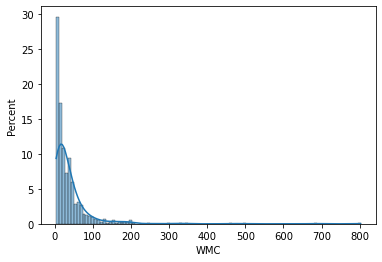

In [27]:
g = sns.histplot(df, x='WMC', stat='percent', kde=True)

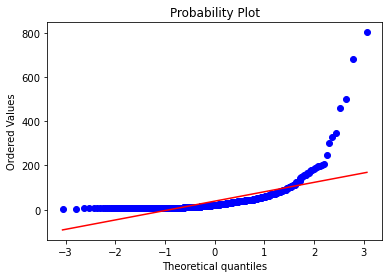

In [28]:
probplot(df["WMC"], dist="norm", plot=plt)
plt.show()

In [29]:
shapiro(df['WMC'])

ShapiroResult(statistic=0.46065759658813477, pvalue=8.906428831494245e-40)

> WMC n'a pas de une distribution normale

#### nombre de lignes de code qui ne sont pas ni vides ni commentaires NCLOC

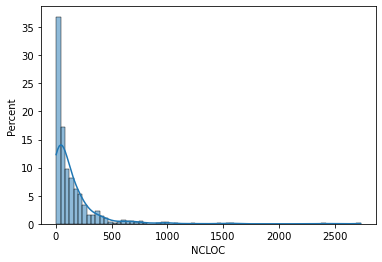

In [30]:
g = sns.histplot(df, x='NCLOC', stat='percent', kde=True)

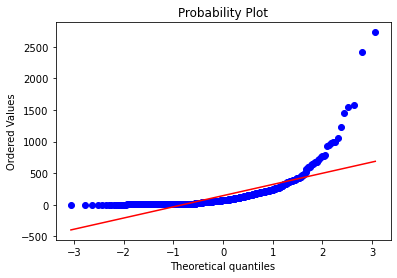

In [31]:
probplot(df["NCLOC"], dist="norm", plot=plt)
plt.show()

In [32]:
shapiro(df['NCLOC'])

ShapiroResult(statistic=0.5453572273254395, pvalue=1.973560058562523e-37)

> NCLOC n'a pas de une distribution normale

#### densité de commentaires (CLOC/LOC) (DCP)

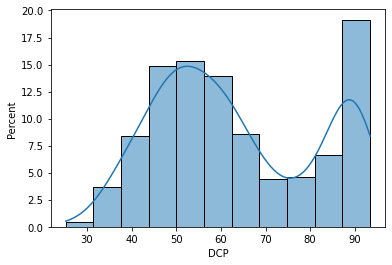

In [33]:
g = sns.histplot(df, x='DCP', stat='percent', kde=True)

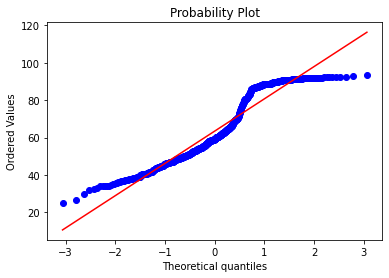

In [34]:
probplot(df["DCP"], dist="norm", plot=plt)
plt.show()

In [35]:
shapiro(df['DCP'])

ShapiroResult(statistic=0.9229280352592468, pvalue=1.8695312510741667e-17)

> DCP n'a pas de une distribution normale

#### nombre de commits (NOCom)

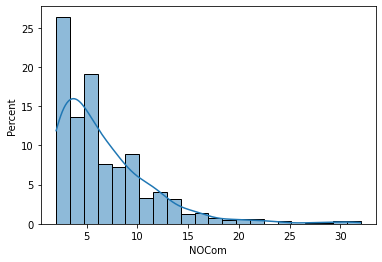

In [36]:
g = sns.histplot(df, x='NOCom', stat='percent', kde=True)

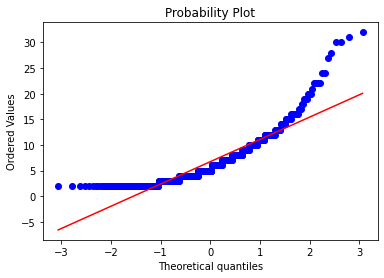

In [37]:
probplot(df["NOCom"], dist="norm", plot=plt)
plt.show()

In [38]:
shapiro(df['NOCom'])

ShapiroResult(statistic=0.8292815089225769, pvalue=2.0391224863417509e-25)

> NOCom n'a pas de une distribution normale

### Tester la force de la relation avec Spearman

#### WMC vs NCLOC

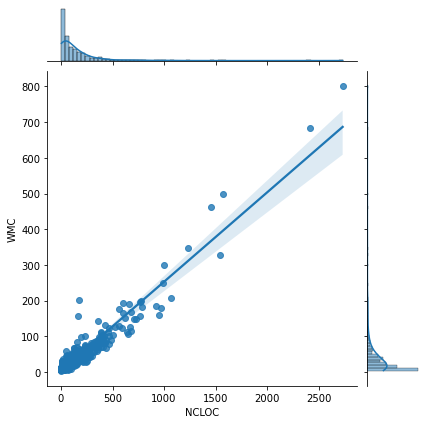

In [39]:
g = sns.jointplot(data=df[['NCLOC', 'WMC']],x="NCLOC", y='WMC', kind="reg")

In [40]:
spearmanr(df['WMC'], df['NCLOC'], alternative='two-sided')

SpearmanrResult(correlation=0.9181022473011337, pvalue=2.110358231735043e-255)

#### WMC vs DCP

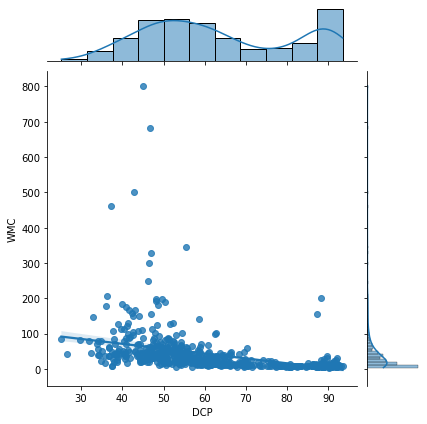

In [41]:
g = sns.jointplot(data=df[['DCP', 'WMC']],x="DCP", y='WMC', kind="reg")

In [42]:
spearmanr(df['WMC'], df['DCP'], alternative='two-sided')

SpearmanrResult(correlation=-0.7711633846038819, pvalue=1.165435976527546e-125)

#### WMC vs NOCom

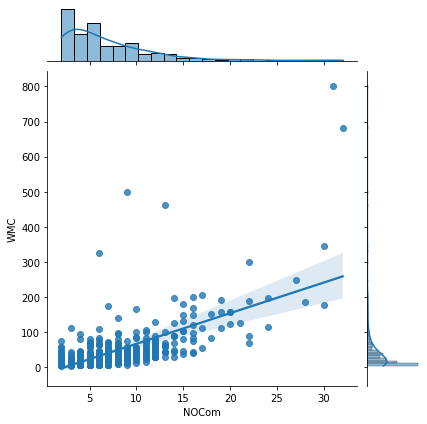

In [43]:
g = sns.jointplot(data=df[['WMC', 'NOCom']],x="NOCom", y='WMC', kind="reg")

In [44]:
spearmanr(df['WMC'], df['NOCom'], alternative='two-sided')

SpearmanrResult(correlation=0.6755334372351737, pvalue=1.9879050467632728e-85)

***<center>Sommaire</center>***

Couple | force de la relation ($R^2$)
------ | ---------------------------
(WMC, NCLOC) | 0.918
(WMC, DCP) | -0.771
(WMC, NOCom) | 0.676

### Exprimer la relation avec une équation

In [82]:
reg1 = linear_model.LinearRegression()
X1 = df["NCLOC"].values.reshape(-1,1)
y1 = df["WMC"].values
reg1.fit(X1, y1)

LinearRegression()

In [83]:
print(f"WMC={round(reg1.coef_[0], 2)} NCLOC + {round(reg1.intercept_,2)}", )

WMC=0.25 NCLOC + 2.49


In [84]:
reg2 = linear_model.LinearRegression()
X2 = df["DCP"].values.reshape(-1,1)
y2 = df["WMC"].values
reg2.fit(X2, y2)

LinearRegression()

In [85]:
print(f"WMC={round(reg2.coef_[0], 2)} DCP + {round(reg2.intercept_,2)}", )

WMC=-1.38 DCP + 126.48


In [86]:
reg3 = linear_model.LinearRegression()
X3 = df["NOCom"].values.reshape(-1,1)
y3 = df["WMC"].values
reg3.fit(X3, y3)

LinearRegression()

In [87]:
print(f"WMC={round(reg3.coef_[0], 2)} NOCom + {round(reg3.intercept_,2)}", )

WMC=8.72 NOCom + -20.01


***<center>Sommaire</center>***

Couple | Équation
------ | ---------------------------
(WMC, NCLOC) | $$WMC = 0.25 NCLOC + 2.49$$
(WMC, DCP) |  $$WMC = -1.38 DCP + 126.48$$
(WMC, NOCom) |  $$WMC = 8.72 NOCom - 20.01$$

### Conclusion

...

Dans une prochaine étude, il serait intéressant de combiner les fichiers de différents projet dans le but de comprendre si ces conclusions se généralisent à d'autres projets.